Datathon

In [2]:
#Librerias a utilizar
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.float_format= '{:.10f}'.format

Abrimos nuestros CSV

In [3]:
dataTrain = pd.read_csv('properties_colombia_train.csv')
dataTest = pd.read_csv('properties_colombia_test.csv')


In [4]:
#Revisamos las columnas, si tenemos nulos y una vista general de los datos
dataTrain.info()
dataTrain.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197549 entries, 0 to 197548
Data columns (total 27 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Unnamed: 0       197549 non-null  int64  
 1   id               197549 non-null  object 
 2   ad_type          197549 non-null  object 
 3   start_date       197549 non-null  object 
 4   end_date         197549 non-null  object 
 5   created_on       197549 non-null  object 
 6   lat              148051 non-null  float64
 7   lon              148051 non-null  float64
 8   l1               197549 non-null  object 
 9   l2               197549 non-null  object 
 10  l3               186517 non-null  object 
 11  l4               45367 non-null   object 
 12  l5               27409 non-null   object 
 13  l6               6867 non-null    object 
 14  rooms            27537 non-null   float64
 15  bedrooms         40525 non-null   float64
 16  bathrooms        156467 non-null  floa

,Unnamed: 0,id,ad_type,start_date,end_date,created_on,lat,lon,l1,l2,...,surface_total,surface_covered,price,currency,price_period,title,description,property_type,operation_type,geometry
0,861131,CScTjaFiP6yCzS8tFX0ZVA==,Propiedad,2020-12-14,9999-12-31,2020-12-14,6.2030000000,-75.5720000000,Colombia,Antioquia,...,NaN,NaN,9000000000.0000000000,COP,NaN,Hermosa Mansión En El Poblado. Área Construida...,<b>Hermosa Mansión En El Poblado. Área Constru...,Casa,Venta,POINT (-75.572 6.203)
1,200972,DlCxox9+FuugkxS2kBVfJg==,Propiedad,2020-09-16,2021-05-14,2020-09-16,4.7227485000,-74.0731146000,Colombia,Cundinamarca,...,NaN,NaN,625000000.0000000000,COP,NaN,"APARTAMENTO EN VENTA, BOGOTA-CIUDAD JARDIN NORTE",Venta apartamento en piso 16 con vista exterio...,Apartamento,Venta,POINT (-74.0731146 4.7227485)
2,554622,yitN1AigL45gh/K2YSF8rw==,Propiedad,2020-08-19,2020-08-20,2020-08-19,4.7090000000,-74.0300000000,Colombia,Cundinamarca,...,NaN,NaN,420000000.0000000000,COP,NaN,Apartamento En Venta En Bogota Bella Suiza Cod...,Al entrar a este bonito apartamento interior e...,Casa,Venta,POINT (-74.03 4.709)
3,540321,hELQ9njwODbLMpATXieRdQ==,Propiedad,2020-11-23,2020-11-30,2020-11-23,NaN,NaN,Colombia,Santander,...,NaN,NaN,1310000000.0000000000,COP,NaN,SE VENDE LOCAL COMERCIAL EN CABECERA DEL LLANO...,Se encuentra ubicado en el sector de la Cabece...,Otro,Venta,POINT EMPTY
4,448920,aBCtKT7LDzt2CxJQ+gVFEA==,Propiedad,2020-10-06,2020-10-07,2020-10-06,NaN,NaN,Colombia,Antioquia,...,NaN,NaN,210000000.0000000000,COP,NaN,Apartamento en Venta Ubicado en ITAGUI,Codigo Inmueble 4302 Apartamento con 3 habitac...,Apartamento,Venta,POINT EMPTY


In [5]:
dataTrain.describe()

,Unnamed: 0,lat,lon,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
count,197549.0000000000,148051.0000000000,148051.0000000000,27537.0000000000,40525.0000000000,156467.0000000000,6974.0000000000,9802.0000000000,197486.0000000000
mean,497437.8438513989,5.6660008586,-75.0410450039,3.2912081926,3.2390623072,2.6392785699,1352.1323487238,948.3356457866,643605091.0064612627
std,290023.5783383411,2.1968043281,1.1045750102,1.7547954706,1.9856356907,1.4371736277,7713.7693518651,37308.7498543641,1944867706.9894244671
min,0.0000000000,-32.7873420000,-119.6981900000,1.0000000000,0.0000000000,1.0000000000,10.0000000000,1.0000000000,0.0000000000
25%,234211.0000000000,4.5823147000,-75.6451258900,3.0000000000,3.0000000000,2.0000000000,72.0000000000,71.0000000000,200000000.0000000000
50%,507385.0000000000,4.9086113000,-75.4766535800,3.0000000000,3.0000000000,2.0000000000,120.0000000000,114.0000000000,330000000.0000000000
75%,770037.0000000000,6.2481005200,-74.0940008850,4.0000000000,4.0000000000,3.0000000000,281.0000000000,216.0000000000,600000000.0000000000
max,993551.0000000000,34.4203340000,-67.4825696000,40.0000000000,96.0000000000,20.0000000000,180000.0000000000,3480000.0000000000,345000000000.0000000000


In [6]:
#Se agrega la columna clasificatoria con el promedio de precio  
dataTrain['p_class'] = np.where(dataTrain['price'] > 643605091.0064612627, 'caro', 'barato')
dataTrain = dataTrain.replace({'barato': 0, 'caro' : 1})


In [7]:
dataTrain.head()

,Unnamed: 0,id,ad_type,start_date,end_date,created_on,lat,lon,l1,l2,...,surface_covered,price,currency,price_period,title,description,property_type,operation_type,geometry,p_class
0,861131,CScTjaFiP6yCzS8tFX0ZVA==,Propiedad,2020-12-14,9999-12-31,2020-12-14,6.2030000000,-75.5720000000,Colombia,Antioquia,...,NaN,9000000000.0000000000,COP,NaN,Hermosa Mansión En El Poblado. Área Construida...,<b>Hermosa Mansión En El Poblado. Área Constru...,Casa,Venta,POINT (-75.572 6.203),1
1,200972,DlCxox9+FuugkxS2kBVfJg==,Propiedad,2020-09-16,2021-05-14,2020-09-16,4.7227485000,-74.0731146000,Colombia,Cundinamarca,...,NaN,625000000.0000000000,COP,NaN,"APARTAMENTO EN VENTA, BOGOTA-CIUDAD JARDIN NORTE",Venta apartamento en piso 16 con vista exterio...,Apartamento,Venta,POINT (-74.0731146 4.7227485),0
2,554622,yitN1AigL45gh/K2YSF8rw==,Propiedad,2020-08-19,2020-08-20,2020-08-19,4.7090000000,-74.0300000000,Colombia,Cundinamarca,...,NaN,420000000.0000000000,COP,NaN,Apartamento En Venta En Bogota Bella Suiza Cod...,Al entrar a este bonito apartamento interior e...,Casa,Venta,POINT (-74.03 4.709),0
3,540321,hELQ9njwODbLMpATXieRdQ==,Propiedad,2020-11-23,2020-11-30,2020-11-23,NaN,NaN,Colombia,Santander,...,NaN,1310000000.0000000000,COP,NaN,SE VENDE LOCAL COMERCIAL EN CABECERA DEL LLANO...,Se encuentra ubicado en el sector de la Cabece...,Otro,Venta,POINT EMPTY,1
4,448920,aBCtKT7LDzt2CxJQ+gVFEA==,Propiedad,2020-10-06,2020-10-07,2020-10-06,NaN,NaN,Colombia,Antioquia,...,NaN,210000000.0000000000,COP,NaN,Apartamento en Venta Ubicado en ITAGUI,Codigo Inmueble 4302 Apartamento con 3 habitac...,Apartamento,Venta,POINT EMPTY,0


Seleccionamos las variables que nos interesan y no generan ruido

In [8]:
dataTrain = dataTrain[['rooms','bedrooms', 'bathrooms', 'surface_covered', 'property_type', 'currency', 'l1', 'p_class']]
dataTest = dataTest[['rooms','bedrooms', 'bathrooms', 'surface_covered', 'property_type']]

In [9]:
# Seleccionamos las filas que tengan COP en currency
dataTrain = dataTrain[dataTrain['currency'] == 'COP']

C:\Users\Core i7\AppData\Local\Temp\ipykernel_12848\1865924349.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(corr, dtype=np.bool))


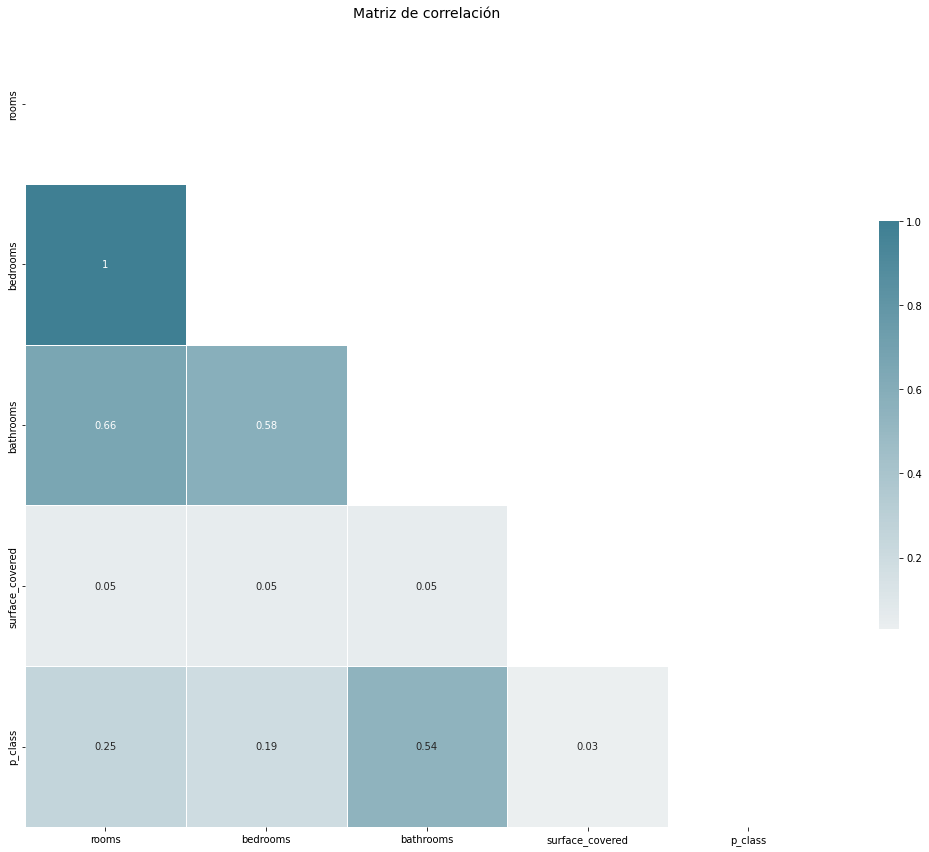

In [10]:
# Realizamos una Matriz de correlación para ver como se relacionan y tomar las que mas peso tengan
corr = dataTrain.corr().round(2)   
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(18, 15))
cmap = sns.diverging_palette(10, 220, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1.0, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)
plt.title("Matriz de correlación", fontsize=14)
plt.show()

In [11]:
# Verificamos los Nulos
dataTrain.isna().sum()

rooms              169980
bedrooms           157006
bathrooms           41058
surface_covered    187719
property_type           0
currency                0
l1                      0
p_class                 0
dtype: int64

In [12]:
# revisamos los datos finales del dataframe
print(dataTrain.tail())

              rooms     bedrooms    bathrooms  surface_covered property_type  \
197544 3.0000000000 3.0000000000          NaN              NaN   Apartamento   
197545          NaN          NaN 1.0000000000    17.0000000000       Oficina   
197546          NaN          NaN 1.0000000000              NaN          Otro   
197547          NaN          NaN 2.0000000000              NaN          Casa   
197548          NaN          NaN 1.0000000000              NaN   Apartamento   

       currency        l1  p_class  
197544      COP  Colombia        0  
197545      COP  Colombia        0  
197546      COP  Colombia        0  
197547      COP  Colombia        0  
197548      COP  Colombia        0  


In [13]:
# Se cambian los datos faltantes por el promedio de datos
dataTrain.fillna(np.mean(dataTrain), inplace=True)
dataTest.fillna(np.mean(dataTest), inplace=True)

C:\Users\Core i7\AppData\Roaming\Python\Python310\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\Users\Core i7\AppData\Roaming\Python\Python310\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [14]:
# Contamos el numero de faltantes
print(dataTrain.isna().sum())
print(dataTest.isna().sum())

rooms              0
bedrooms           0
bathrooms          0
surface_covered    0
property_type      0
currency           0
l1                 0
p_class            0
dtype: int64
rooms              0
bedrooms           0
bathrooms          0
surface_covered    0
property_type      0
dtype: int64


In [15]:
# Iteramos sobre cada columna de dataTrain
for col in dataTrain.columns:
    # Revisamos si la columna es tipo object
    if dataTrain[col].dtypes == 'object':
        # Cambiamos los faltantes con los valores frecuentes
        dataTrain = dataTrain.fillna(dataTrain[col].value_counts().index[0])
        dataTest = dataTest.fillna(dataTrain[col].value_counts().index[0])

In [16]:
dataTrain.head()

,rooms,bedrooms,bathrooms,surface_covered,property_type,currency,l1,p_class
0,3.2901724013,4.0000000000,4.0000000000,946.7107124552,Casa,COP,Colombia,1
1,3.2901724013,3.0000000000,2.0000000000,946.7107124552,Apartamento,COP,Colombia,0
2,3.2901724013,3.2383364634,2.0000000000,946.7107124552,Casa,COP,Colombia,0
3,3.2901724013,3.2383364634,1.0000000000,946.7107124552,Otro,COP,Colombia,1
4,3.2901724013,3.2383364634,2.0000000000,946.7107124552,Apartamento,COP,Colombia,0


In [17]:
# Eliminamos las variables currency y l1 ya que no aportan al modelo
dataTrain = dataTrain.drop(columns=['currency', 'l1'])

In [18]:
# importamos la libreria OrdinalEncoder
from sklearn.preprocessing import OrdinalEncoder

In [19]:
# Utilizamos OrdinalEncoder para transformar la variable property_type en variable numerica
enc = OrdinalEncoder()
dataTrain[["property_type"]] = enc.fit_transform(dataTrain[["property_type"]])
dataTest[["property_type"]] = enc.fit_transform(dataTest[["property_type"]])


In [20]:
dataTrain.head()

,rooms,bedrooms,bathrooms,surface_covered,property_type,p_class
0,3.2901724013,4.0000000000,4.0000000000,946.7107124552,1.0000000000,1
1,3.2901724013,3.0000000000,2.0000000000,946.7107124552,0.0000000000,0
2,3.2901724013,3.2383364634,2.0000000000,946.7107124552,1.0000000000,0
3,3.2901724013,3.2383364634,1.0000000000,946.7107124552,6.0000000000,1
4,3.2901724013,3.2383364634,2.0000000000,946.7107124552,0.0000000000,0


Construyendo el modelo de decision

In [21]:
# importamos las librerias sklear para realizar el entrenamiento y predicciones
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score

In [22]:
# Definimos la variable X,y
X = dataTrain.drop(['p_class'],axis=1)
y = dataTrain.p_class

In [23]:
# Dividimos el dataset en training set y test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [24]:
#  Instanciamos el Clasificador de Arbol de Decision 
rf = RandomForestClassifier(n_estimators=1000,
            random_state=2)

In [25]:
# Entrenamos el modelo
rf.fit(X_train, y_train) 

RandomForestClassifier(n_estimators=1000, random_state=2)

In [26]:
# Realizamos la predicción con la parte test de nuestro dataset 'dataTrain'
y_pred = rf.predict(X_test)

In [27]:
# Imprimimos en Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8237597690866432


In [29]:
# Se calcula la matriz de confusión
cm = confusion_matrix(y_test,y_pred)
cm

array([[42930,  2428],
       [ 8013,  5872]], dtype=int64)

In [30]:
# Calculamos el recall score de nuestro modelo
recall_score(y_test, y_pred, average=None)

array([0.9464703 , 0.42290241])

In [49]:
# Realizamos las predicciones correspondientes a nuesto dataset 'dataTest'
Y_predT = rf.predict(dataTest)

In [51]:
# Exportamos el archivo
file = pd.DataFrame(Y_predT, columns = ['pred'])

file.to_csv('Arons159.csv', index = False)